# Trading Dataset: S&P 500

In [2]:
import numpy as np
import pandas as pd
import sklearn as sklearn
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import accuracy_score()
import time


from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot as plt

In [3]:
#from google.colab import drive 
#drive.mount('/content/drive')

# Importing Dataset

In [4]:
mydataset = pd.read_csv('dataset1.csv')
spy = mydataset.iloc[:,:].values
spy.shape[0]
mydataset.head(5)

,Date,EMA10,EMA25,USD/JPY,USD/EUR,USD/GBP,USD/HKD,GOLD,OIL,UK rate,Euro rate,FFR,T10Y-T2Y,OUPUT
0,2000-02-08,0.01577,0.00949,0.00074,0.00059,0.01084,0.00008,-0.00662,0.00035,0.0575,0.0225,0.0567,-0.0010,0
1,2000-02-09,0.01594,0.01207,0.00027,0.00030,-0.00048,0.00003,0.01404,0.00071,0.0575,0.0225,0.0576,-0.0013,-1
2,2000-02-10,-0.00292,-0.00711,-0.00064,0.00099,-0.00500,0.00005,-0.00588,0.00591,0.0600,0.0225,0.0579,0.0000,0
3,2000-02-11,-0.00077,-0.00499,0.00046,0.00020,-0.00788,0.00008,0.00696,0.00034,0.0600,0.0225,0.0571,-0.0002,-1
4,2000-02-14,-0.01115,-0.01739,-0.00230,-0.00030,-0.00335,0.00005,0.00032,0.00000,0.0600,0.0225,0.0579,-0.0006,0


# Data viz

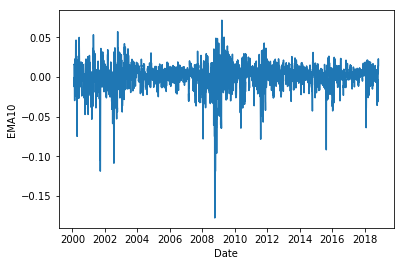

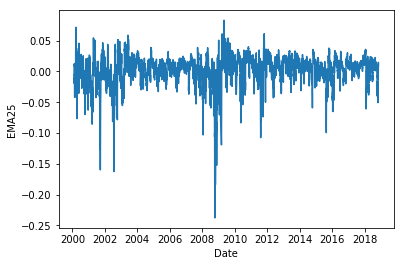

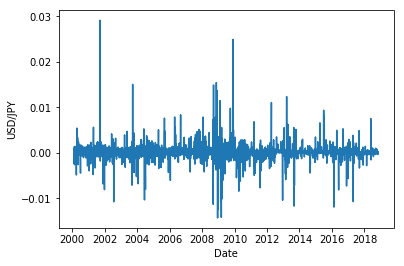

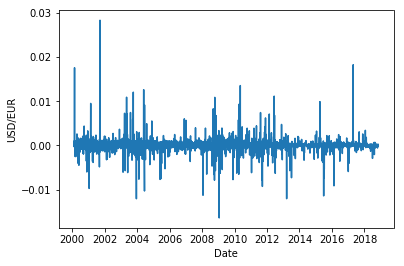

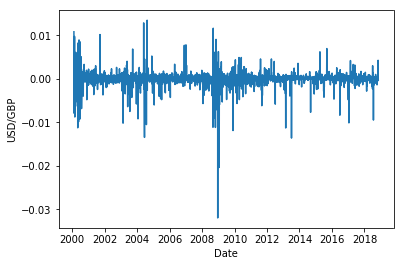

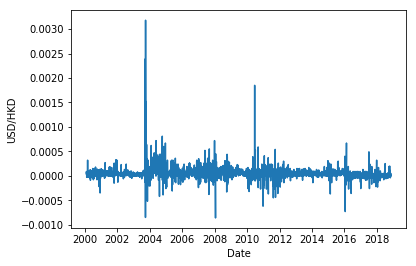

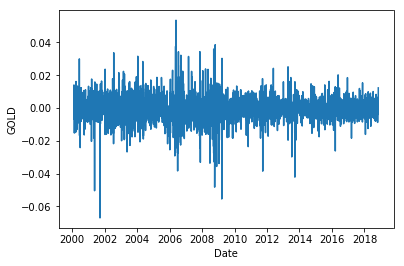

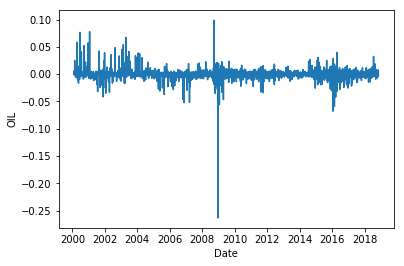

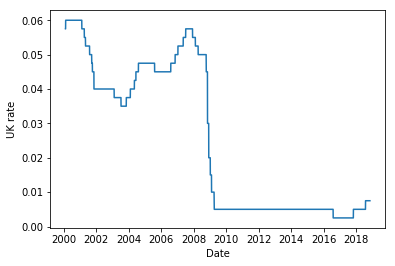

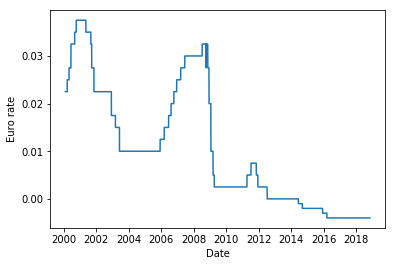

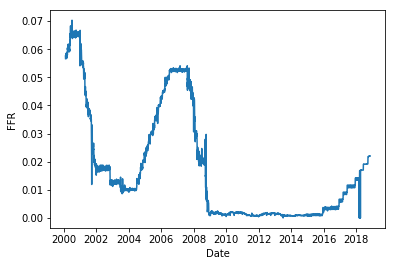

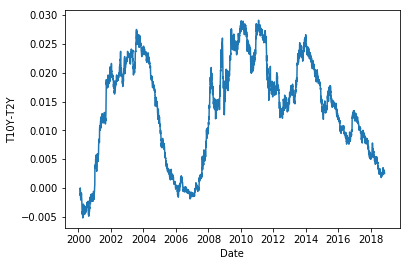

In [5]:
import pandas as pd
# Get the dataset columns
mydataset['Date'] = pd.to_datetime(mydataset['Date'])
column = mydataset.columns
# Columns whithout the first and the last 
col = column[1:-1]
k = 0
for i in col : 
    plt.plot(mydataset.Date,mydataset[i])
    plt.ylabel(col[k])
    plt.xlabel('Date')
    plt.show()
    k = k+1

# Tuning functions
These functions will be used in the second strategy of split i.e. extending window. 
Each time the training set grows by adding additional observations, the whole following procedure is repeated :

for each algorithm repeat :

*   Grid search to find the best hyper parameters
*   Train model with best hyper parameters 
*   Predict on the testing set 
*   Compute the accuracy of the model





In [6]:
def log_tune_pred(x_train,y_train,x_test,y_test):
  logistic = LogisticRegression()
  parameter_logistic1 = {'tol':[0.00001, 0.01], 
                       'C':[1e-4,1e-2,0.1,1,10], 
                       'solver':('newton-cg', 'sag', 'lbfgs'),
                      'tol' : [1e-2,1] , 'max_iter' : [100,1000,10000]}

  CV_logistic1 = GridSearchCV(logistic, parameter_logistic1, cv = 5)
  CV_logistic1.fit(x_train, y_train.astype('float'))
  print(CV_logistic1.best_params_)
  predlog1 = CV_logistic1.predict(x_test)
  acc = accuracy_score(y_test.astype("float"),predlog1)
  return acc

In [7]:
def rf_tune_pred(x_train,y_train,x_test,y_test):
  rfc = RandomForestClassifier()
  parameter_rfc1 = {'n_estimators':[10, 200], 
                   'criterion':('gini', 'entropy'),'max_depth':[1,20], 
                   'min_samples_split':[2,20], 
                   'min_samples_leaf':[1,20], 
                   'max_features':('auto','sqrt','log2'),
                   'min_impurity_decrease':[0.0001,0.9999]}


  CV_rfc1 = GridSearchCV(rfc, parameter_rfc1, cv = 5)
  CV_rfc1.fit(x_train, y_train.astype('float'))
  print(CV_rfc1.best_params_)
  predrf = CV_rfc1.predict(x_test)
  acc = accuracy_score(y_test.astype("float"),predrf)
  return acc

In [8]:
def svm_tune_pred(x_train,y_train,x_test,y_test):
  svm = SVC()
  parameter_svm1 = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 
                  'C':[0.1, 10],
                  'gamma':[0.01,0.9]}

  CV_svm1 = GridSearchCV(svm, parameter_svm1, cv = 5)
  CV_svm1.fit(x_train, y_train.astype('float'))
  print(CV_svm1.best_params_)
  predsvm1 = CV_svm1.predict(x_test)
  acc = accuracy_score(y_test.astype("float"),predsvm1)
  return acc

# Splitting strategy 1 
All records up to the split point are taken as the training dataset and all records from the split point to the end of the list of observations are taken as the test set.

The first 80% of the data are taking for training the models. 
The last 20% are taking for testing the models

Conclusions

*   This first strategy gives good results as the basic models yield to an accuracy of about 70% on the testing set 
*   Pros : Not long to compute , takes into account all the records up to date,  useful when having large amount of data so that both training and tests sets are representative of the original problem.
 * Computational time for logeistic regression :13.42544960975647 sec
 * Computational time for randomforest : 6.770708604653676 min
 * Computational time for svm : 50.491835594177246 sec
*   Cons : Not adapted to problems where old observations and recent ones can't be compared due to the real context of the problem  


In [9]:
train_size = int(len(spy) * 0.8)
train, test = spy[0:train_size], spy[train_size:len(spy)]

In [10]:
print(train.shape)
print(test.shape)

(3780, 14)
(945, 14)


In [11]:
x_train=train[:,1:-1]
y_train = train[:,13]
x_test=test[:,1:-1]
y_test = test[:,13]

In [12]:
 ## evaluate models
t0_log = time.time()
accu_log = log_tune_pred(x_train,y_train,x_test,y_test)
t1_log = time.time()


t0_rf = time.time()
accu_rf = rf_tune_pred(x_train,y_train,x_test,y_test)
t1_rf = time.time()

t0_svm = time.time()
accu_svm = svm_tune_pred(x_train,y_train,x_test,y_test)
t1_svm = time.time()
  
print('Observations: %d' % (len(train) + len(test)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
  
print("Accuracy Logistic:", accu_log)
print("Accuracy Random Forest:",  accu_rf)
print("Accuracy SVM:",  accu_svm)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

{'C': 1, 'max_iter': 100, 'solver': 'sag', 'tol': 0.01}
{'criterion': 'entropy', 'max_depth': 1, 'max_features': 'auto', 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
{'C': 10, 'gamma': 0.9, 'kernel': 'sigmoid'}
Observations: 4725
Training Observations: 3780
Testing Observations: 945
Accuracy Logistic: 0.7164021164021164
Accuracy Random Forest: 0.7153439153439154
Accuracy SVM: 0.7153439153439154


In [13]:
### Computation 
print((t1_log - t0_log), 'sec')
print((t1_rf - t0_rf)/60 , "min")
print((t1_svm - t0_svm), 'sec')

7.98481822013855 sec
3.667175515492757 min
27.487472772598267 sec


# Splitting strategy 2

Splitting the time series into train and test sets multiple times.

As each time the training set is extended, we call this method "extending window"

We decided to compute a grid search each time the training set is extended because we believe that adding hundreds of observations at a time can make the optimal parameters change

Conclusions:
* Pros : adapted to contexts where new data is periodically received and added to previous data (monthly, every 3 months etc.) 
* More robust robust estimate of the expected performance of the chosen method and configuration on unseen data.
* Cons : Requires multiple models to be trained and evaluated.

In [14]:
X=spy
splits = TimeSeriesSplit(n_splits=6)
splits

TimeSeriesSplit(max_train_size=None, n_splits=6)

In [15]:
accuracies_log = []
accuracies_rf = []
accuracies_svm = []

T0_log = []
T1_log = []

T0_rf = []
T1_rf = []

T0_svm = []
T1_svm = []

for train_index,test_index in splits.split(X):
  ## split data
    train = X[train_index]
    x_train = train[:,1:-1]
    y_train = train[:,-1]
  
    test = X[test_index]
    x_test = test[:,1:-1]
    y_test = test[:,-1]
    ## evaluate models
    T0_log.append(time.time()) 
    accu_log = log_tune_pred(x_train,y_train,x_test,y_test)
    accuracies_log.append(accu_log)
    T1_log.append(time.time()) 
  
    T0_rf.append(time.time()) 
    accu_rf = rf_tune_pred(x_train,y_train,x_test,y_test)
    accuracies_rf.append(accu_rf)
    T1_rf.append(time.time()) 
  
    T0_svm.append(time.time()) 
    accu_svm = svm_tune_pred(x_train,y_train,x_test,y_test)
    accuracies_svm.append(accu_svm)
    T1_svm.append(time.time()) 
    
print('Observations: %d' % (len(train) + len(test)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
  
#print("Accuracy for Logistic Regression second splitting strategy: ",accuracies)
print("Mean accuracy Logistic:",  np.mean(accuracies_log))
print("Mean accuracy Random Forest:",  np.mean(accuracies_rf))
print("Mean accuracy SVM:",  np.mean(accuracies_svm))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

{'C': 10, 'max_iter': 100, 'solver': 'sag', 'tol': 0.01}


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 10}
{'C': 10, 'gamma': 0.9, 'kernel': 'rbf'}


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linea

{'C': 10, 'max_iter': 1000, 'solver': 'sag', 'tol': 0.01}


KeyboardInterrupt: 

In [ ]:
accuracies_log

In [ ]:
accuracies_rf

In [ ]:
accuracies_svm

In [ ]:
# computation time 
time_log = np.array(T1_log) - np.array(T0_log)
time_rf = np.array(T1_rf) - np.array(T0_rf)
time_svm = np.array(T1_svm) - np.array(T0_svm)

# Splitting strategy 3

Sliding window

Motivation : very old data not important to predict the yields of a day 

Solution : Only take into account the record of last 3 months (60 working days) and predict on one single example

As the size of the training set is always the same (60), and as the nature of the variables and the observations are consistent through time, we decided to dedicate roughly the first 25% of the data (1000 observations) to the task of finding the optimal hyper parameters that will then be used to train the data several times on training sets defined with a sliding window of the same width (60)

Pros : realistic, robust
Cons : computation time but as we run the grid search only 1 time, better that strategy 2

As a loss function, we use sum(indicatrice(prediction != true value))

### Grid search

In [ ]:
## take off the first 1000 rows and do a grid search on it
data_grid = spy[:1000]
data_grid.shape
train_size = int(len(data_grid) * 0.7)
train, test = data_grid[0:train_size], data_grid[train_size:len(spy)]

x_train_grid=train[:,1:-1]
print(x_train_grid.shape)
y_train_grid = train[:,13]
print(y_train_grid.shape)

x_test_grid=test[:,1:-1]
print(x_test_grid.shape)
y_test_grid = test[:,13]
print(y_test_grid.shape)

In [ ]:
logistic = LogisticRegression()
parameter_logistic1 = {'tol':[0.00001, 0.01], 
                       'C':[1e-4,1e-2,0.1,1,10], 
                       'solver':('newton-cg', 'sag', 'lbfgs'),
                      'tol' : [1e-2,1] , 'max_iter' : [100,1000,10000]}

CV_logistic1 = GridSearchCV(logistic, parameter_logistic1, cv = 2)
CV_logistic1.fit(x_train_grid, y_train_grid.astype('float'))
predlog1 = CV_logistic1.predict(x_test_grid)
print("Best parameters for Logistic regression: ",CV_logistic1.best_params_)
acc = accuracy_score(y_test_grid.astype("float"),predlog1)
acc

In [ ]:
rfc = RandomForestClassifier()

parameter_rfc1 = {'n_estimators':[10, 200], 
                   'criterion':('gini', 'entropy'),'max_depth':[1,20], 
                   'min_samples_split':[2,20], 
                   'min_samples_leaf':[1,20], 
                   'max_features':('auto','sqrt','log2'),
                   'min_impurity_decrease':[0.0001,0.9999]}


CV_rfc1 = GridSearchCV(rfc, parameter_rfc1, cv = 2)
CV_rfc1.fit(x_train_grid, y_train_grid.astype('float'))
predrfc1 = CV_rfc1.predict(x_test_grid)
print("Best parameters for Random forest 1: ",CV_rfc1.best_params_)
acc = accuracy_score(y_test_grid.astype("float"),predrfc1)
acc

In [ ]:
svm = SVC()

parameter_svm1 = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 
                  'C':[0.1, 10],
                  'gamma':[0.01,0.9]}

CV_svm1 = GridSearchCV(svm, parameter_svm1, cv = 2)
CV_svm1.fit(x_train_grid, y_train_grid.astype('float'))
predsvm1 = CV_svm1.predict(x_test_grid)

print("Best parameters for SVM1: ", CV_svm1.best_params_)
acc = accuracy_score(y_test_grid.astype("float"),predsvm1)
acc

### Sliding window function

In [ ]:
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
def sliding_win (data,length_win=60):
  contplus_log = 0
  contplus_rf = 0
  contplus_svm = 0
  start = length_win
  
  while (start<len(data)-1): ## start+1= point to be predicted
    #print(start+1)
    sub_data = data[start-length_win:start]
  
    x_train=sub_data[:,1:-1]
    y_train = sub_data[:,13]
    y_train = y_train.astype('float')
    x_test=data[start+1,1:-1].reshape(1,-1)
    y_test = data[start+1,13]
    
  
    ## test models 
    logistic = LogisticRegression(C=10, max_iter=100, solver= 'sag', tol = 0.01)
    logistic.fit(x_train,y_train)
    logistic.predict(x_test)
    
    randomforest = RandomForestClassifier(criterion = 'gini',
                              max_depth = 5,
                              max_features = 'log2',
                              min_impurity_decrease = 0.0001,
                              min_samples_leaf = 20,
                              min_samples_split = 2,
                              n_estimators = 10)
    randomforest.fit(x_train,y_train)
    randomforest.predict(x_test)
    
    svm= SVC(C = 10, kernel = 'rbf', gamma = 0.9, decision_function_shape = 'ovo')
    svm.fit(x_train,y_train)
    svm.predict(x_test)
      
    if (logistic.predict(x_test)==y_test):
      contplus_log = contplus_log + 1
    if (randomforest.predict(x_test)==y_test):
      contplus_rf = contplus_rf + 1
    if (svm.predict(x_test)==y_test):
      contplus_svm = contplus_rf + 1
    start = start+1
  print(contplus_log/(4725-1000-60))
  print(contplus_rf/(4725-1000-60))
  print(contplus_svm/(4725-1000-60))
  #return res
  

In [ ]:
sliding_win(spy[1000:])

# NEURAL NETWORK

In [ ]:
data_nn = spy
print('Data shape :')
print(data_nn.shape)

# First strategy

train_size = int(len(data_nn) * 0.8)
train, test = data_nn[0:train_size], data_nn[train_size:len(spy)]

x_train1 = train[:,1:-1]
print('xtrain1 shape :')
print(x_train1.shape)
y_train1 = train[:,13]
y_train1 = y_train1.astype('int')
print('y_train1 shape :')
print(y_train1.shape)

x_test1 = test[:,1:-1]
print('xtest1 shape :')
print(x_test1.shape)
y_test1 = test[:,13]
print('y_test1 shape :')
y_test1 = y_test1.astype('int')
print(y_test1.shape)

# Standardization
scaler = StandardScaler()  
scaler.fit(x_train1)
x_train1 = scaler.transform(x_train1)  
x_test1 = scaler.transform(x_test1) 

NN1 = MLPClassifier(hidden_layer_sizes=(15, 10,10, 15, 20, 10),random_state=1,activation = 'relu',
                 solver = 'adam', max_iter= 1000)    
NN1 = NN1.fit(x_train1, y_train1)
NN1_score_train1 = NN1.score(x_train1, y_train1)
pred_train1 = NN1.predict(x_train1)
print(pred_train1)
print('Accuracy on the training set 1: {:.3f}'.format(NN1_score_train1))
NN1_score_test1 = NN1.score(x_test1, y_test1)
t0_nn = time.time()
pred_test1 = NN1.predict(x_test1)
t1_nn = time.time()
#print(pred_test1)
print('Accuracy on the test set 1: {:.3f}'.format(NN1_score_test1))
print(confusion_matrix(y_test1,pred_test1))  
print(classification_report(y_test1,pred_test1))  
print(t1_nn-t0_nn, "sec")


# Parameters tested for the hidden layers
#(15, 10,10, 15, 20, 10) 71.3%
# (15, 20, 20) 71.0%
# (100, 100, 100) 47.2%
# (1000) 68.5%
# (2000) 70.5%
# (3000) 69.8%
# (4000) 69.6%
# (5000) 70.5%
# (1000, 1000) 58.2%   time execution is too long for very poor benefit 
# (1000,1000,1000)  57.5%   same
# (300) 71.0%
# (100) 71.3%




In [ ]:
# Second strategy

splits = TimeSeriesSplit(n_splits=6)
accuracies_nn = []
T0_nn = []
T1_nn  = []
for train_index,test_index in splits.split(data_nn):
    ## split data
    train = data_nn[train_index]
    x_train2 = train[:,1:-1]
    y_train2 = train[:,-1]
    y_train2 = y_train2.astype('int')
    test = data_nn[test_index]
    x_test2 = test[:,1:-1]
    y_test2 = test[:,-1]
    y_test2 = y_test2.astype('int')
    ## evaluate models
    scaler = StandardScaler()  
    scaler.fit(x_train2)
    x_train2 = scaler.transform(x_train2)  
    x_test2 = scaler.transform(x_test2) 
    NN2 = MLPClassifier(hidden_layer_sizes= (15, 10,10, 15, 20, 10) ,random_state=1,activation = 'relu',
                 solver = 'adam', max_iter= 1000) 
    
    NN2 = NN2.fit(x_train2, y_train2)
    NN2_score_train2 = NN2.score(x_train2, y_train2)
    pred_train2 = NN2.predict(x_train2)
    NN2_score_test2 = NN2.score(x_test2, y_test2)
    T0_nn.append(time.time()) 
    pred_test2 = NN2.predict(x_test2)
    T1_nn.append(time.time())
    accuracies_nn.append(NN2_score_test2)

print('Observations: %d' % (len(train) + len(test)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
print("Mean accuracy Neural Network :",  np.mean(accuracies_nn))
 


# Third strategy
# The gridsearch takes too much time, so we surrend this strategy

# Plots

In [ ]:
time_nn = np.array(T1_nn) - np.array(T0_nn)

In [ ]:
labels = ["split 1","split 2","split 3",'split 4', 'split 5', 'split 6']  
plt.figure(figsize = (10,8))
plot_timelog, = plt.plot(labels,time_log,label="logistic regression")
plot_timerf, = plt.plot(labels,time_rf, label = "random forest")
plot_timesvm, = plt.plot(labels,time_svm, label = "svm")
plot_timenn, = plt.plot(labels, time_nn, label = "neural network")
plt.legend(handles=[plot_timelog,plot_timerf,plot_timesvm, plot_timenn],loc=1) 
plt.ylabel('time (in sec)',fontsize = 14)
plt.title("Evolution of computational time",fontsize = 14)

In [ ]:
labels = ["split 1","split 2","split 3",'split 4', 'split 5', 'split 6']  
plt.figure(figsize = (10,8))
plot_log, = plt.plot(labels,accuracies_log,label="logistic regression")
plot_rf, = plt.plot(labels,accuracies_rf, label = "random forest")
plot_svm, = plt.plot(labels,accuracies_svm, label = "svm")
plot_nn, = plt.plot(labels, accuracies_nn, label = "neural network")
plt.legend(handles=[plot_log,plot_rf,plot_svm,plot_nn],loc=1) 
plt.title("Evolution of accuracy")
print(type(plot_nn))
print(type(plot_svm))